In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

bike_rentals = pd.read_csv('../data/raw/bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [152]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [3]:
bike_rentals.cnt.median()

142.0

In [6]:
36/ bike_rentals.cnt.std()

0.19847001768719316

In [132]:
bike_rentals.dteday

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object

<Axes: >

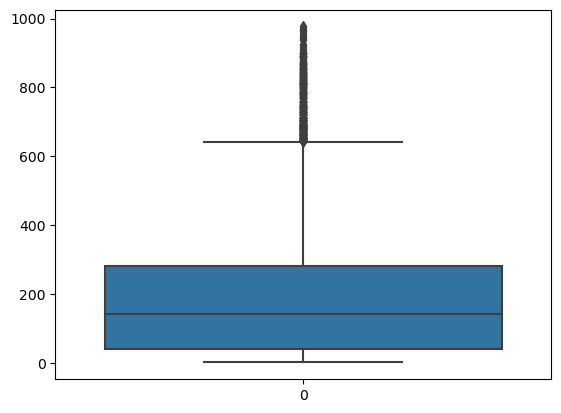

In [133]:
sns.boxplot(bike_rentals.cnt)

In [134]:
import pandas as pd

# Assuming bike_rentals is your DataFrame
# Calculate the IQR for the "cnt" column
Q1 = bike_rentals['cnt'].quantile(0.25)
Q3 = bike_rentals['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only the rows within the bounds
bike_rentals = bike_rentals[(bike_rentals['cnt'] >= lower_bound) & (bike_rentals['cnt'] <= upper_bound)]


In [135]:
bike_rentals.cnt.max() - bike_rentals.cnt.min()

641

In [136]:
6/641

0.0093603744149766

<Axes: xlabel='cnt', ylabel='Density'>

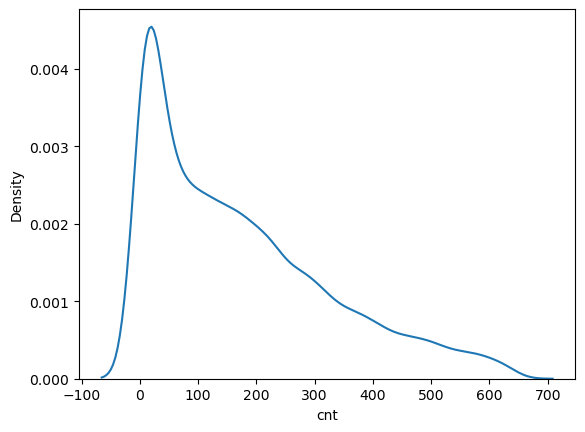

In [137]:
sns.kdeplot(bike_rentals.cnt)

In [138]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     16874 non-null  int64  
 1   dteday      16874 non-null  object 
 2   season      16874 non-null  int64  
 3   yr          16874 non-null  int64  
 4   mnth        16874 non-null  int64  
 5   hr          16874 non-null  int64  
 6   holiday     16874 non-null  int64  
 7   weekday     16874 non-null  int64  
 8   workingday  16874 non-null  int64  
 9   weathersit  16874 non-null  int64  
 10  temp        16874 non-null  float64
 11  atemp       16874 non-null  float64
 12  hum         16874 non-null  float64
 13  windspeed   16874 non-null  float64
 14  casual      16874 non-null  int64  
 15  registered  16874 non-null  int64  
 16  cnt         16874 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [139]:
bike_rentals.select_dtypes(include='number').describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000


In [140]:
bike_rentals.select_dtypes(include='number').corrwith(bike_rentals.cnt)

instant       0.225204
season        0.173731
yr            0.191555
mnth          0.116116
hr            0.420853
holiday      -0.020246
weekday       0.023018
workingday   -0.000904
weathersit   -0.138768
temp          0.401579
atemp         0.398330
hum          -0.326973
windspeed     0.097801
casual        0.720223
registered    0.967572
cnt           1.000000
dtype: float64

<Axes: >

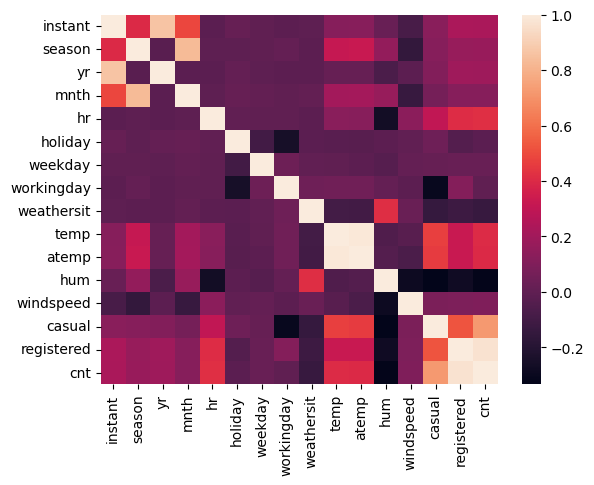

In [141]:
sns.heatmap(bike_rentals.select_dtypes(include='number').corr())

<Axes: xlabel='cnt', ylabel='Density'>

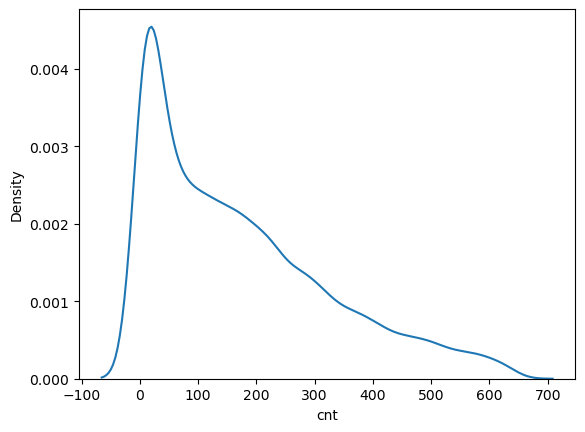

In [142]:
sns.kdeplot(bike_rentals.cnt)

#### Data Preparation

In [143]:
predictors  = bike_rentals.drop(['casual', 'registered', 'cnt', 'dteday', 'yr'], axis = 1)
target = bike_rentals.cnt

#### Model Selection & Evaluation 

#### Conducting Data Split 

In [144]:
# Train Test Split

from  sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test =  train_test_split( predictors, target, test_size=0.2, random_state=42)


#### Model Selection

In [145]:
#### Using CV to compare different models

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



lin_rg = LinearRegression()
dt_rg = DecisionTreeRegressor(random_state = 42)
rf_rg = RandomForestRegressor(random_state = 42)

# Performing cross_val on each model 

n_folds = 3

lin_rg_scores = - cross_val_score(lin_rg, X_train, Y_train, cv = n_folds, scoring = 'neg_root_mean_squared_error')
dt_rg_scores  = -cross_val_score(dt_rg, X_train, Y_train, cv = n_folds, scoring = 'neg_root_mean_squared_error') 
rf_rg_scores = - cross_val_score(rf_rg, X_train, Y_train, cv = n_folds, scoring = 'neg_root_mean_squared_error')





linear_regression_mean_score = np.mean(lin_rg_scores)
decision_tree_mean_score = np.mean(dt_rg_scores)
random_forest_mean_score = np.mean(rf_rg_scores)


print( 
      {
        "Linear Regression" : linear_regression_mean_score,
        "Decision Tree" : decision_tree_mean_score,
        "Random Forest" : random_forest_mean_score
        } 
      
      )


{'Linear Regression': 121.32163360820334, 'Decision Tree': 57.94333029892286, 'Random Forest': 40.96700447247972}


In [146]:
from sklearn.metrics import  mean_squared_error

rf_rg.fit(X_train, Y_train)
mean_squared_error(Y_test, rf_rg.predict(X_test))

1351.8460529777778

In [148]:
from sklearn.metrics import  mean_squared_error

rf_rg.fit(X_train, Y_train)
preds = rf_rg.predict(X_test)

In [150]:
log_actual = np.log(Y_test)
log_pred = np.log(preds)

mse = mean_squared_error(log_actual, log_pred)

np.sqrt(mse)

0.35493631715065604

Selected Model 

Random Foest has the lowest cross_val MSE therefore will be model of choice for this prediction.

#### Model Optimization

Hyperparameter tuning


### Model Building 

Defining Predictors & Target 

Predictor Variables: All but these columns ['casual', 'registered', 'cnt', 'dteday', 'yr']
Target Variable : cnt

Explanation: cnt is formed by adding casual & registered and therefore  can't be used as predictors. Removing yr & dteday to make the data time independant with the focus being on conditions on a given day as opposed to which year the day had ocured. In this case, we avoid the trap of predicting past outcomes with future data. 


Conducting Data Split,  
Conduct Train Test Split with a test size equal to 20 % of the population


Model Selection:

 Use cross_val score with metric 'neg_mean_squared_error' and 3 folds. Candidate models: LinearRegression, DecisionTreeRegressor, RandomForestRegressor. Calculate - cross_val score for all three models and select the one with the smallest cv score. 

Explanation:

Use of cross validation: We are using cross-validation to establish model performance that is independant of the sample we choose thereby making model selection fair
Choice of folds: We are choosing 3 folds so that the train & test sets have significant amount of data points 

Choice of Candidate Models 

Linear Regression: Classic Model to capture linear relationships, will serve as a good baseline model 
Decision Tree Regressor, RandomForestRegressor:  Will capture non-linear relationships in the data. 


Building Final Model 

RandommForestRegressor has the least MSE therefore is the model of choice for this problem. 
Conduct hyperparameter tuning on the selected model and use this refined model. 










